<a href="https://colab.research.google.com/github/kocurvik/edu/blob/master/3DV/labs/cv02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 3D Vision Labs

In this lab we will work with SVD and rotations.

In [ ]:
import numpy as np

### Exercise - Linear System

We can alse define linear systems. Use `np.linalg.solve` to find the solution to the following system:

![](https://www.lifehacker.com.au/wp-content/uploads/sites/4/2016/02/Fruit.jpg)

In [ ]:
...

Linear system has a solution:  [10.  1.  1.]
The problem then has a solution:  14.0


### Exercise - Linear system using SVD

Solve the same system using SVD by calculating the pseudoinverse matrix (which is the inverse matrix in this case) and then apply it using $A^{-1}\vec{b} = \vec{x}$.

In [ ]:
...

Linear system has a solution:  [10.  1.  1.]
The problem then has a solution:  13.999999999999998


### Exercise SVD

Use SVD to determine the null-space and rank of the following matrix.

In [ ]:
A = np.array([[4, 5, 3, 0], [1, 0, 0, 1], [9, 10, 6, 1], [1, 1, 0, 0], [7, 1, 0, 6]])
print(A)

[[ 4  5  3  0]
 [ 1  0  0  1]
 [ 9 10  6  1]
 [ 1  1  0  0]
 [ 7  1  0  6]]


In [ ]:
...

[1.74360183e+01 7.32500489e+00 5.74082616e-01 6.30976137e-16]
2.1784148785229476e-15


## Axis-angle from matrix

Create an algorithm that computes the axis of rotation for a given rotation matrix. Test it using the following generator of random rotations.

In [ ]:
def calculate_axis(R):
  # implement
  return np.array([1,0,0])

In [ ]:
def generate_random_rotation():
  R = np.linalg.qr(np.random.randn(3, 3))[0]
  if np.linalg.det(R) < 0:
    R[:, 2] *= -1
  return R

from scipy.spatial.transform import Rotation

def print_axis_angle(R, axis_calculated):
  print("Our axis: ", axis_calculated)

  vec = Rotation.from_matrix(R).as_rotvec()
  vec /= np.linalg.norm(vec)

  print("Correct axis: ", vec)

for _ in range(5):
  R = generate_random_rotation()
  print_axis_angle(R, calculate_axis(R))

Our axis:  [ 0.31202372 -0.48949212 -0.81427186]
Correct axis:  [-0.31202372  0.48949212  0.81427186]
Our axis:  [-0.33260141  0.05418731 -0.94150944]
Correct axis:  [ 0.33260141 -0.05418731  0.94150944]
Our axis:  [-0.28156983  0.52916318 -0.80044036]
Correct axis:  [ 0.28156983 -0.52916318  0.80044036]
Our axis:  [-0.14369569  0.37530509  0.91569517]
Correct axis:  [-0.14369569  0.37530509  0.91569517]
Our axis:  [-0.4662597  -0.60549362  0.64496463]
Correct axis:  [ 0.4662597   0.60549362 -0.64496463]


## Kabsch Algorithm

Implement [the Kabsch algorithm](https://en.wikipedia.org/wiki/Kabsch_algorithm). Use it to find the randomly generated rotation $R$ based on $X$ and $Y$. Then determine the error of the algorithm in degrees between the $R$ used to generate the data and $R$ obtained by the algorithm.

In [ ]:
def generate_noisy_rotated_data(n, sigma):
  X = np.random.randn(n, 3)

  R = generate_random_rotation()

  Y = (R @ X.T).T + np.random.randn(n, 3) * sigma

  return X, Y, R

In [ ]:
def kabsch(X, Y):
  # implement
  R = np.eye(3)
  return R

In [ ]:
def rotation_error(R1, R2):
  # implement
  return 0.0

The following code should test your code and output a plot with errors.

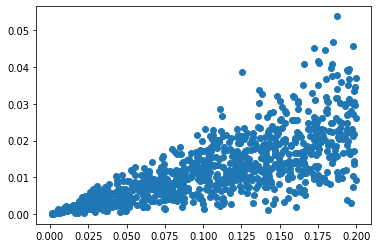

In [ ]:
from matplotlib import pyplot as plt

sigmas = []
errors = []

for _ in range(1000):
  sigma = 0.2 * np.random.rand()
  X, Y, R_gt = generate_noisy_rotated_data(100, sigma)
  R_kabsch = kabsch(X, Y)

  errors.append(rotation_error(R_gt, R_kabsch))
  sigmas.append(sigma)

plt.scatter(sigmas, errors)
plt.show()

## Linear Least Squares

For this exercise we will have pairs of data $(x_i, y_i)_{i=1..n}$. We want to fit a second order polynomial to the data: 

$$ y \approx p(x) = a x^2 + b x + c $$

If we only had three pairs we could determine the exact values for $a, b, c$. But we want to fit a larger dataset with $n$ elements where $n >> 3$. Therefore we want to find $a, b, c$ which minimize the following expression:

$$ \sum_{i=1}^N  (p(x_i) - y_i)^2$$.

Use the information from the lecture to find the solution using SVD. The code below generates noisy data and then plots the results.


In [ ]:
def fit_poly(x, y):
  # implement
  
  a, b, c = 0, 0, 0
  return a, b, c

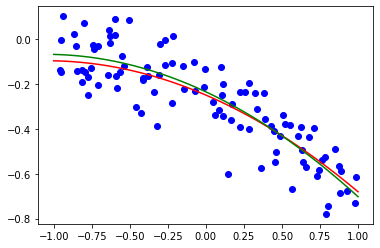

In [ ]:
def generate_noisy_polynomial_data(n, sigma):
  x = 2 * np.random.rand(n) - 1.0
  a = np.random.rand() - 0.5
  b = np.random.rand() - 0.5
  c = np.random.rand() - 0.5

  y = a * x ** 2 + b * x + c + sigma * np.random.randn(n)
  return x, y, a, b, c

x_plot = np.linspace(-1, 1, 1000)
x, y, a_gt, b_gt, c_gt = generate_noisy_polynomial_data(100, 0.1)
a, b, c = fit_poly(x, y)

plt.scatter(x, y, c='b')
plt.plot(x_plot, a_gt * x_plot ** 2 + b_gt * x_plot + c_gt, c='r')
plt.plot(x_plot, a * x_plot ** 2 + b * x_plot + c, c='g')
plt.show()